In [ ]:
# Install R and necessary packages
!apt-get install -y r-base
!apt-get install -y r-cran-ggplot2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-cran-ggplot2 is already the newest version (3.5.1-1.ca2204.1).
r-cran-ggplot2 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
# Install the R magic extension
%load_ext rpy2.ipython

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [29]:
%%R
library(ggplot2)
# library(plotly)

# Load data
data <- read.csv("train.csv")
names(data)

 [1] "bedroom"           "bathrooms"         "area"             
 [4] "furnishing"        "avalable_for"      "address"          
 [7] "floor_number"      "facing"            "floor_type"       
[10] "gate_community"    "corner_pro"        "parking"          
[13] "wheelchairadption" "petfacility"       "aggDur"           
[16] "noticeDur"         "lightbill"         "powerbackup"      
[19] "propertyage"       "no_room"           "pooja_room"       
[22] "study_room"        "others"            "servant_room"     
[25] "store_room"        "maintenance_amt"   "brok_amt"         
[28] "deposit_amt"       "mnt_amt"           "rent"             


In [56]:
%%R
install.packages("tm")
install.packages("wordcloud")
install.packages("RColorBrewer")
install.packages("plotly")

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp9lf82a/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp9lf82a/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp9lf82a/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/Rtmp9lf82a/downloaded_packages’



In [32]:
%%R
# Load required libraries
library(tm)
library(wordcloud)
library(RColorBrewer)

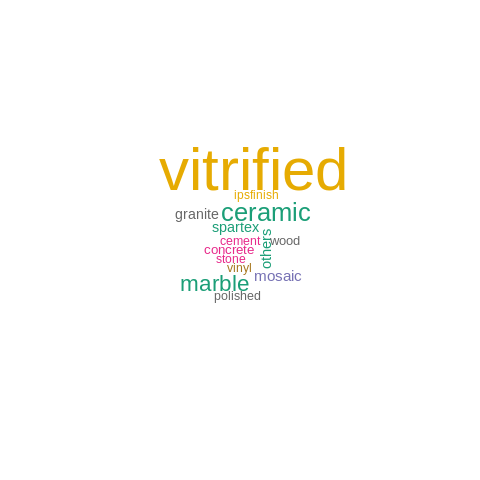

In [104]:
%%R
# Load the data
data <- read.csv("train.csv")


# Check for missing or empty values in the 'not provided' column
data <- data[!is.na(data$floor_type) & data$floor_type != "Not provided", ]

# Create the word cloud for 'Type of Furnishing'
wordcloud(data$`floor_type`, min.freq = 1,random.color = TRUE,rot.per = 0.3 , scale = c(5, 1),colors = brewer.pal(8, "Dark2"))

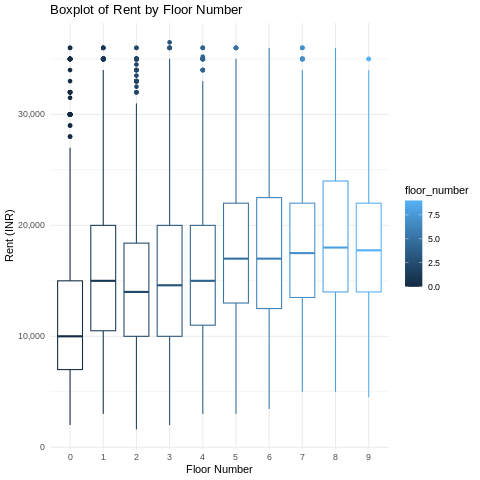

In [91]:
%%R
# Load necessary library
library(ggplot2)

data <- read.csv("train.csv")

# Calculate IQR and determine outlier thresholds
Q1 <- quantile(data$rent, 0.25, na.rm = TRUE)
Q3 <- quantile(data$rent, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Define thresholds for outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Filter out outliers
cleaned_data <- data[data$rent >= lower_bound & data$rent <= upper_bound, ]

# Create a boxplot of rent by floor number
ggplot(cleaned_data, aes(x = factor(floor_number), y = rent)) +
  geom_boxplot(aes(color = floor_number)) +
  labs(x = "Floor Number", y = "Rent (INR)",
       title = "Boxplot of Rent by Floor Number") +
  theme_minimal()+scale_y_continuous(labels = scales::comma)

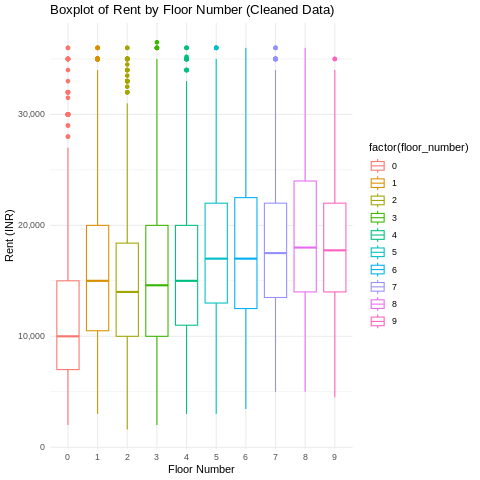

In [93]:
%%R
# Load necessary library
library(ggplot2)

# Load your data
data <- read.csv("train.csv")

# Ensure the rent column is numeric
data$rent <- as.numeric(data$rent)

# Calculate IQR and determine outlier thresholds
Q1 <- quantile(data$rent, 0.25, na.rm = TRUE)
Q3 <- quantile(data$rent, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Define thresholds for outliers
lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

# Filter out outliers
cleaned_data <- data[data$rent >= lower_bound & data$rent <= upper_bound, ]

# Create a boxplot of rent by floor number with cleaned data
ggplot(cleaned_data, aes(x = factor(floor_number), y = rent)) +
  geom_boxplot(aes(color = factor(floor_number))) +
  labs(x = "Floor Number", y = "Rent (INR)",
       title = "Boxplot of Rent by Floor Number (Cleaned Data)") +
  theme_minimal() +
  scale_y_continuous(labels = scales::comma)


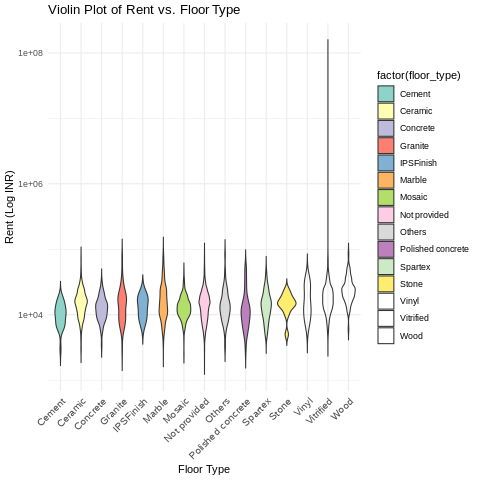

In [99]:
%%R
library(ggplot2)

# Violin plot of Rent vs Floor Type
ggplot(data, aes(x = factor(floor_type), y = rent, fill = factor(floor_type))) +
  geom_violin(trim = FALSE) +
  scale_y_continuous(trans = 'log10') +  # Log scale for better visualization
  labs(x = "Floor Type", y = "Rent (Log INR)", title = "Violin Plot of Rent vs. Floor Type") +
  theme_minimal() + scale_fill_brewer(palette = "Set3") + theme(
    axis.text.x = element_text(angle = 45, hjust = 1,size = 10)
  )


`geom_smooth()` using formula = 'y ~ x'


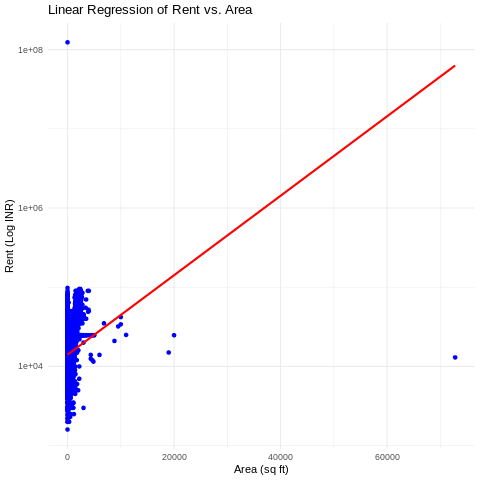

In [101]:
%%R
library(ggplot2)

# Linear regression plot of Rent vs Area
ggplot(data, aes(x = area, y = rent)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  scale_y_continuous(trans = 'log10') +  # Log scale for better visualization
  labs(x = "Area (sq ft)", y = "Rent (Log INR)", title = "Linear Regression of Rent vs. Area") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


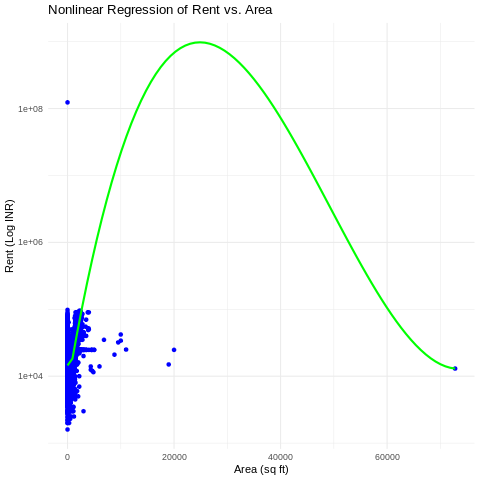

In [53]:
%%R
library(ggplot2)

# Nonlinear regression plot (Loess) of Rent vs Area
ggplot(data, aes(x = area, y = rent)) +
  geom_point(color = "blue") +
  geom_smooth(method = "loess", color = "green", se = FALSE) +
  scale_y_continuous(trans = 'log10') +  # Log scale for better visualization
  labs(x = "Area (sq ft)", y = "Rent (Log INR)", title = "Nonlinear Regression of Rent vs. Area") +
  theme_minimal()


In [105]:
import plotly.graph_objects as go
import pandas as pd

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data['area'],
    y=data['rent'],
    z=data['bedroom'],
    mode='markers',
    marker=dict(
        size=10,
        color=data['rent'],  # Color by rent
        colorscale='Viridis',
        colorbar=dict(title='Rent (INR)')
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Area (sq ft)',
        yaxis_title='Rent (INR)',
        zaxis_title='Number of Bedrooms'
    ),
    title='3D Scatter Plot of Rent, Area, and Number of Bedrooms',width=800,height=600
)

# Show the plot
fig.show()

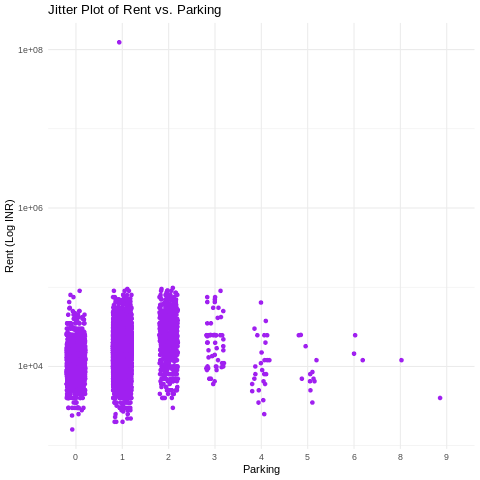

In [55]:
%%R
library(ggplot2)

# Jitter plot of Rent vs Parking
ggplot(data, aes(x = factor(parking), y = rent)) +
  geom_jitter(color = "purple", width = 0.2) +
  scale_y_continuous(trans = 'log10') +  # Log scale for better visualization
  labs(x = "Parking", y = "Rent (Log INR)", title = "Jitter Plot of Rent vs. Parking") +
  theme_minimal()